# Titanic data analysis and prediction

## 1. Data Cleaning

We import the packages we will use for the data analysis part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

Let's open the dataset, for the analysis part we will work only on the training data that contains values for the "Survived" variable. 

In [2]:
df = pd.read_csv('C:/Users/sarac/Desktop/Projects/KagglePrivate/Titanic_Data/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can start by creating a missing data matrix to see what kind of data we are missing

In [3]:
def missing_matrix(dataframe):
    missing = dataframe.isnull().sum().reset_index()
    missing.columns = (["column","count"])
    missing["ratio"] = missing["count"]/len(dataframe.index)
    missing = missing.loc[missing["count"] > 0].sort_values(by=["ratio"], ascending = False)
    return missing

In [4]:
missing_matrix(df)

,column,count,ratio
10,Cabin,687,0.771044
5,Age,177,0.198653
11,Embarked,2,0.002245


We will start by cleaning the data, we will also create variables that I think can be useful for the analysis and the prediction later. Let's work on both the training and test data so we don't have to go through the process two times. For the analysis, we will work only on the part of the training data as it contains values for the "Survived" variable.

In [5]:
dftest = pd.read_csv('C:/Users/sarac/Desktop/Projects/KagglePrivate/Titanic_Data/titanic/test.csv')
dftest.insert(1, "Survived", np.nan)

In [6]:
dfcomb = pd.concat([df, dftest], ignore_index = True)
dfcomb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### We can go through variables to see what we can use, drop, create for the prediction and analysis part. But our intuition may be wrong that's why we need the analysis part to confirm, reject or discover relations.

**PassengerId:** doesn't bring any information as the Id is certainly randomly given or in order of registration. Actually the registration order may give some information such as socio-economic status or status if tickets were sold to people with higher status first. In our case we have other varaibles that gives the same information and we don't know if our assumption holds. So we will most likely not use the Id in our model

**Survived:** It is the predicted variable.

**Pclass:** Categorical feature that we will most likely use. Chances that it correlates with **Fare** is high but we will see that the later will most likely be transformed. Some passengers paid a higher fare than others while being in a lower class. That is because the fare is the price paid for one purchase, meaning that 5 people from the second class may in total pay more than 2 person in 1st class but that doesn't mean they are richer or that their ticket is worth more. That is why we will transform ths variable.

**Name:** This variable is useless as it is but using titles in people names and create categories my be helpful. Titles are a sign of wealth and status and will probably correlate with Pclass and Fare (transformed).

**Sex:** Obvious with the save woman and children first policy.

**Age:** Same reason as above. Also we have a lot of missing values and some outliers. We could just drop those rows but they account for nearly 1/5 of our dataset. So we decide to use the encyclopedia where after some research people were able to find the age of some of those persons. We will certainly webscrape to retrieve the ages.

**SibSp & Parch:** We can use these variables to create the variable family size. We can assume that trying to save a family may lead to lwoer chances of surviving. We could also use **Ticket** for groups that are not blood-related. We will see later which variable leads to better results.

**Ticket:** Can also be used to create groups but also to split the **Fare** to the real value per person.

**Fare:** The fare once split will show the price per passenger. So we will see what is paid by each passenger and the real value of their ticket. 

**Cabin:** The cabin location can be the reason someone lives or dies. After some research, we learned that the cabin number gives information about the deck. Most of the passengers in 2nd and 3rd class don't have a cabin number.

**Embarked:** Should not have any effect

In [7]:
dfclean = dfcomb

Let's start with the name variable and take the title from it. The name itself is not interesting but the title may give information about the importance of someone. There is no rule saying that we must save important people first but who knows ? maybe their prestige played a role in their survival or the variable is related to another factor that we are missing.

In [8]:
if "Title" not in dfclean.columns:
    dfclean.insert(3, "Title", dfclean["Name"]) #add the new column

In [9]:
for i in dfclean:
    dfclean["Title"] = dfclean["Name"].str.extract('([A-Za-z]+)\.')
    
print(dfclean["Title"].unique())  #We took every string combination that came before the dot

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [10]:
def replace_titles(dataframe):
    title = dataframe["Title"]
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if dataframe['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [11]:
dfclean["Title"]=dfclean.apply(replace_titles, axis=1)
dfclean[["Name","Title"]]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
1304,"Spector, Mr. Woolf",Mr
1305,"Oliva y Ocana, Dona. Fermina",Mrs
1306,"Saether, Mr. Simon Sivertsen",Mr
1307,"Ware, Mr. Frederick",Mr


In [12]:
dfclean[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

                
dfclean['Title'] = dfclean['Title'].map( {"Mr": 1, "Master": 2, "Mrs": 4, "Miss": 3} ).astype(int)

Next on the line is the Age variable where we have a lot of missing data.
One way to solve this would be to replace missing values by the mean or median but missing values account for 20% of our data, the range goes from 0,17 to 80 but the distribution is pretty spread out. Another option would be to use the mean for people for each title because it separates people by age

In our case we will use webscraping to get values we are missing from https://en.wikipedia.org/wiki/Passengers_of_the_Titanic .
We could use www.encyclopedia-titanica.org but the way the information is displayed in wikipedia makes it easier to webscrap. Our only downside is that we do not have the ticket number information to confirm the identity of a passenger but knowing how famous our dataset is, it is unlikely that there are wrong data in the wiki.

Let's import what we need for the webscraping

In [13]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

In [14]:
titanic_page = requests.get("https://en.wikipedia.org/wiki/Passengers_of_the_Titanic")
titanic_tree = BeautifulSoup(titanic_page.content, "html.parser")
column_names = ["NameWeb", "AgeWeb"]
NameW = []

for info in titanic_tree.find_all("tr"):    
    col = 0
    for td in info.find_all('td'):
        td_text = td.get_text().strip()
        if col == 0:
            Name = td_text
            NameW.append(Name)
        col += 1

last = NameW.index("Zimmermann, Mr. Leo") #the last element we need is number 1310
#pprint(NameW)
Name = NameW[:last + 1]

#We managed to retrieve all the names but also some info we do not need that's why we stop the list at "Mr Zimmerman"

In [15]:
AgeW = []

for info in titanic_tree.find_all("tr"):
    col = 0
    for td in info.find_all('td'):
        td_text = td.get_text().strip()
        if col == 1:
            Age = td_text
            AgeW.append(Age)
        col += 1
        

Age = AgeW[:last + 1]

def num_there(s):
    return any(i.isdigit() for i in s)

def list_cleaner(list):
    for x in list:
        ind = list.index(x)
        if x == "–":
            list[ind] = round(dfclean["Age"].mean(),0)
        elif "mo." in x:
            months = ''.join(filter(str.isdigit, x))
            list[ind] = round(int(months)/12,2)
        elif num_there(x) == False:
            list[ind] = list[ind - 1]
    return list

list_cleaner(Age)

Age.insert(19, "24")  #some more random cleaning because teh html layout of the wiki is not perfect
del Age[-1]
Age.insert(293, "48")
del Age[-1]
Age.insert(442, "24")
del Age[-1]

#pprint(Age)

#print(len(Age)) #  =1311 

for n in Name:
    indMiss = Name.index(n)
    if "Miss" in n:
        a = n.replace("Miss", "Miss.")
        a = a.replace("Miss..", "Miss.")
        Name[indMiss] = a

w = {'Name':Name,'Age':Age}
Webdf = pd.DataFrame(w)

Webdf
miss = missing_matrix(dfclean)
miss

,column,count,ratio
11,Cabin,1014,0.774637
1,Survived,418,0.319328
6,Age,263,0.200917
12,Embarked,2,0.001528
10,Fare,1,0.000764


Let's fill our dataframe with the data we found on the web
fortunately the names in the wiki page seems to follow the same template

In [16]:
indiceslist = []
indexMiss = 0
count = 0
for i in dfclean["Age"]:
    if np.isnan(i):
        if any(dfclean.at[indexMiss, "Name"] in string for string in Webdf["Name"]):
            indice = [i for i, s in enumerate(Webdf["Name"]) if dfclean.at[indexMiss, "Name"] in s]
            #print(indice[0])         #if there are more than 1 this could be a bad idea but in our case the only
            indiceslist.append(indice)     #moment it happens, we take the first one so its ok
            
            #print(dfclean.at[indexMiss, "Name"])
            dfclean.at[indexMiss, "Age"] = Webdf.at[indice[0], "Age"]
            count += 1

    indexMiss += 1 

In [17]:
def checkIfDuplicates(listOfElems):
    ''' Check if given list contains any duplicates '''    
    for elem in listOfElems:
        if listOfElems.count(elem) > 1:
            return True
    return False

In [18]:
checkIfDuplicates(indiceslist)

from nltk import flatten
indices = flatten(indiceslist) #because we actually have a list of list

We are able to retrieve the age of 148 person out of 263, we could do more by changing the way the name is written in our dataframe but it is good enough, we will use the mean by title to fill the rest

In restrospect, using the encyclopedia would have been better as we could match the ticket number and avoid having to match the name. Maybe next time I will try this method

In [19]:
missing_matrix(dfclean)

,column,count,ratio
11,Cabin,1014,0.774637
1,Survived,418,0.319328
6,Age,115,0.087853
12,Embarked,2,0.001528
10,Fare,1,0.000764


We reduced our missing Ages to 8,7% with real values wich is not bad i guess. Let's fill the rest with the mean per title method

In [20]:
#{"Mr": 1, "Master": 2, "Mrs": 4, "Miss": 3}

dfclean.loc[(dfclean.Age.isnull())&(dfclean.Title==1),"Age"] = round(dfclean.Age[dfclean.Title==1].mean(),0)
dfclean.loc[(dfclean.Age.isnull())&(dfclean.Title==4),"Age"] = round(dfclean.Age[dfclean.Title==4].mean(),0)
dfclean.loc[(dfclean.Age.isnull())&(dfclean.Title==3),"Age"] = round(dfclean.Age[dfclean.Title==3].mean(),0)
dfclean.loc[(dfclean.Age.isnull())&(dfclean.Title==2),"Age"] = round(dfclean.Age[dfclean.Title==2].mean(),0)

missing_matrix(dfclean)

,column,count,ratio
11,Cabin,1014,0.774637
1,Survived,418,0.319328
12,Embarked,2,0.001528
10,Fare,1,0.000764


In [21]:
dfclean.insert(7, "AgeRange", dfclean['Age'], allow_duplicates=True)

In [22]:
dfclean.loc[ dfclean['AgeRange'] <= 20, 'AgeRange'] = 0
dfclean.loc[(dfclean['AgeRange'] > 20) & (dfclean['AgeRange'] <= 40), 'AgeRange'] = 1
dfclean.loc[(dfclean['AgeRange'] > 40) & (dfclean['AgeRange'] <= 60), 'AgeRange'] = 2
dfclean.loc[(dfclean['AgeRange'] > 60) & (dfclean['AgeRange'] <= 80), 'AgeRange'] = 3
dfclean.loc[ dfclean['AgeRange'] > 80, 'AgeRange'] 

Series([], Name: AgeRange, dtype: float64)

Now let's take care of our SibSp & Parch variables, we can use those variables to create the "family-size" variable. As we said earlier having a family on board may lead to people risking their live to save them and more chances to die or the opposite as they may get help

We will also try another version with the ticket variable as people may be in the same group without being blood-related and the will to save the other may be the same

In [23]:
#Let's create our "Family" variable

if "Family" not in dfclean.columns:
    dfclean["Family"] = dfclean["SibSp"] + dfclean["Parch"]
    #dfclean = dfclean.drop(["Parch"], axis="columns")
    #dfclean = dfclean.drop(["SibSp"], axis="columns")
    
#And our "Group" variable

difftickets = dfclean['Ticket'].value_counts(dropna=False)

if "Group" not in dfclean.columns:
    dfclean.insert(11, "Group", 1)
  
for t in difftickets.index:
    dfclean.loc[(dfclean.Ticket==t),"Group"] = difftickets[t] - 1  #we want to count "friends" only not the person itself

pd.set_option("display.max_rows", 10)
#dfclean.sort_values(by=['Group', 'Ticket'], ascending=False)

In [24]:
if 'Alone' not in dfclean.columns:
    dfclean.insert(13, "Alone", 0, allow_duplicates=True)
    dfclean.loc[dfclean['Group'] == 0, 'Alone'] = 1

In [25]:
dfclean['Embarked'] = dfclean['Embarked'].fillna('S')
dfclean['Embarked'] = dfclean['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

We will create the "FareCap" column in order to have the real value of a ticket but apparently the fare variable is much more complicated as the prices vary depending on where the ticket is bought, there were discounts for childrens but we do not know the value of the discount. Some passengers have a fare = 0 but it seems that those are not mistakes but people who got free tickets. The mean of the Pclass variable can be used to estimate the amount of their Fare because if we keep a Fare of 0, the model may underestimate the "value" of those people. 


In [26]:
dffare0 = dfclean[dfclean["Fare"] == 0]

indexlist = dffare0.index

dfclean.loc[(dfclean.Fare == 0 ) & (dfclean.Pclass==1),"Fare"] = round(dfclean.Fare[dfclean.Pclass==1].mean(),0)
dfclean.loc[(dfclean.Fare == 0 ) & (dfclean.Pclass==2),"Fare"] = round(dfclean.Fare[dfclean.Pclass==2].mean(),0)
dfclean.loc[(dfclean.Fare == 0 ) & (dfclean.Pclass==3),"Fare"] = round(dfclean.Fare[dfclean.Pclass==3].mean(),0)

ind = dfclean[dfclean['Fare'].isna()].index
ind
dfclean.at[ind[0],'Fare'] = round(dfclean.Fare[dfclean.Pclass==3].mean(),0)

Let's work on our "Cabin" variable, we will separate it in decks to translate the effect of being below or on top in the Titanic

In [27]:
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

if "Cabin" in dfclean.columns:
    dfclean["Cabin"] = dfclean["Cabin"].fillna("U0")
    dfclean["Deck"] = dfclean['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dfclean["Deck"] = dfclean['Deck'].map(deck)
    dfclean['Deck'] = dfclean['Deck'].fillna(0)
    dfclean['Deck'] = dfclean['Deck'].astype(int)
 
if "Cabin" in dfclean.columns:
    dfclean = dfclean.drop("Cabin", axis = 1)

Fare per capita will be a variable where we split the Fare by the number of similar ticket, so we get the real price of the ticket

In [28]:
dfclean["FarePerCap"] = round(dfclean["Fare"]/(dfclean["Group"] + 1),2)

In [29]:
if 1 in dfclean["Sex"]:
    dfclean['Sex'] = dfclean['Sex'].replace([1, 0], ['female', 'male'])

We can now split our data and analyse the one where we have our "Survived" variable, after or during the analysis we may need to create new variables so these datasets are not the final ones

In [30]:
dfcleanTrain = dfclean.iloc[:891, :]
dfcleanTest = dfclean.iloc[891:, :]

## 2. Data Analysis

### Gender

In [31]:
dfgender = dfcleanTrain.groupby('Sex').aggregate(Count = ("Survived", 'count'),
                                      Survivors = ("Survived", 'sum'),
                                      Mean_age = ('Age', 'mean'),
                                      Mean_fare = ('FarePerCap', 'mean')).round(2)

dfgender.insert(2, 'Surv %', (dfgender.Survivors/dfgender.Count * 100).round(2))

dfgender

,Count,Survivors,Surv %,Mean_age,Mean_fare
Sex,,,,,
female,314,233.0,74.20,27.88,16.66
male,577,109.0,18.89,30.50,14.26


We can clearly see the difference in survival rates between women and men

In [32]:
from statsmodels.stats.weightstats import ztest

In [33]:
test = ztest(x1 = dfcleanTrain[dfcleanTrain['Sex'] == "female"]['Survived'] ,
    x2 = dfcleanTrain[dfcleanTrain['Sex'] == "male"]['Survived'],
             alternative = 'two-sided')  #our n = 891 > 30
zstat = test[0].round(2)
pvalue = test[1] #we reject H0

In [34]:
dfclass = dfcleanTrain.groupby(['Sex','Pclass'], as_index = False).aggregate(Count = ("Survived", 'count'),
                                      Survivors = ("Survived", 'sum'),
                                      Mean_age = ('Age', 'mean'),
                                      Mean_fare = ('FarePerCap', 'mean')).round(2)

dfclass.insert(2, '% Surv', (dfclass.Survivors/dfclass.Count * 100).round(2))

dfclass

,Sex,Pclass,% Surv,Count,Survivors,Mean_age,Mean_fare
0,female,1,96.81,94,91.0,34.68,35.61
1,female,2,92.11,76,70.0,28.98,11.47
2,female,3,50.00,144,72.0,22.86,7.02
3,male,1,36.89,122,45.0,41.01,35.70
4,male,2,15.74,108,17.0,30.34,11.75
5,male,3,13.54,347,47.0,26.85,7.50


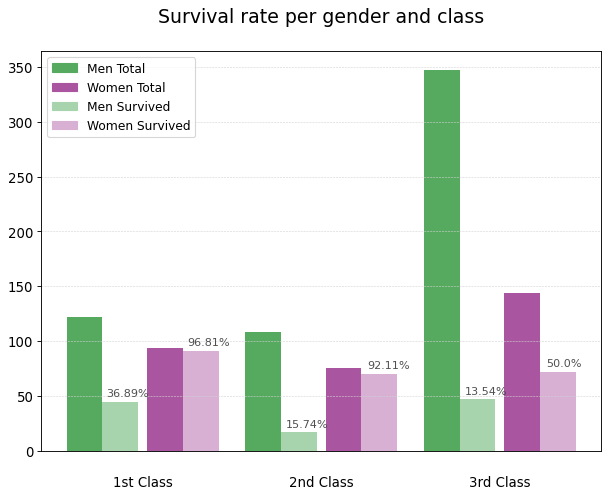

In [35]:
import matplotlib.patches as mpatches

yMS = dfclass.loc[(dfclass.Sex == 'male'), "Survivors"]
yFS = dfclass.loc[(dfclass.Sex == 'female'), "Survivors"]
yMT = dfclass.loc[(dfclass.Sex == 'male'), "Count"]
yFT = dfclass.loc[(dfclass.Sex == 'female'), "Count"]
yPerc = dfclass.sort_values(['Pclass', 'Sex'], ascending = [True, False])
yPerc = yPerc['% Surv']

yMSFS = dfclass.sort_values(['Pclass', 'Sex'], ascending = [True, False])
yMSFS = yMSFS['Survivors'].reset_index(drop=True)

X = np.arange(3)
fig = plt.figure(figsize=(7,5), dpi = 80)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, yMT, color = '#55AA5F', width = 0.2)
ax.bar(X + 0.2, yMS, color = '#A8D4AD', width = 0.2)
ax.bar(X + 0.45, yFT, color = '#AA55A0', width = 0.2)
ax.bar(X + 0.65, yFS, color = '#d7b0d3', width = 0.2)

xline = np.arange(0, 3, 3/6)
#plt.plot(xline, yPerc*3, color='#CCCCCC')

men = mpatches.Patch(color='#55AA5F', label='Men Total')
women = mpatches.Patch(color='#AA55A0', label='Women Total')
menS = mpatches.Patch(color='#A8D4AD', label='Men Survived')
womenS = mpatches.Patch(color='#d7b0d3', label='Women Survived')


a = 0
for i, v in enumerate(yPerc):
    if i == 1 or i == 3:
        ax.text(0.12 + a, yMSFS[i] + 5, str(v) + '%' , color='#4F4F4F', fontsize = 10)
        a += 0.55
    else:
        ax.text(0.12 + a, yMSFS[i] + 5, str(v) + '%', color='#4F4F4F', fontsize = 10)
        a += 0.455
        


plt.legend(handles=[men, women,menS, womenS], loc = 'upper left', fontsize = 11)

plt.grid(b=True, which='both', axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.title('Survival rate per gender and class\n', fontsize = 17)
plt.xticks(X + 0.325 , ['\n1st Class', '\n2nd Class', '\n3rd Class'], fontsize = 12)
plt.yticks(fontsize=12, rotation=0)
plt.tick_params(bottom = False)


plt.show()

Women in 1st class have the highest survival rate while men in 3rd class have the lowest. Well being a women making you more likely to survive was kinda obvious but having more chances to survive because you have more money is less logical. The effect may be indirect and through another variable like the deck variable. We don't really need to know the exact reason to predict later but we can look at a correlation matrix to see how variables interact with each other.

In [36]:
dfcleanTrain['Sex'] =  dfcleanTrain['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

corr = dfcleanTrain.corr()
    
corr.round(2)

<ipython-input-36-e9f8641bf743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcleanTrain['Sex'] =  dfcleanTrain['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


,PassengerId,Survived,Pclass,Title,Sex,Age,AgeRange,SibSp,Parch,Group,Fare,Alone,Embarked,Family,Deck,FarePerCap
PassengerId,1.00,-0.01,-0.04,-0.03,-0.04,0.04,0.03,-0.06,-0.00,-0.01,0.02,0.02,-0.03,-0.04,-0.03,0.03
Survived,-0.01,1.00,-0.34,0.56,0.54,-0.06,-0.06,-0.04,0.08,0.06,0.25,-0.25,0.11,0.02,-0.29,0.24
Pclass,-0.04,-0.34,1.00,-0.16,-0.13,-0.37,-0.32,0.08,0.02,-0.04,-0.56,0.27,0.05,0.07,0.75,-0.77
Title,-0.03,0.56,-0.16,1.00,0.93,-0.07,-0.05,0.17,0.30,0.22,0.18,-0.39,0.09,0.27,-0.13,0.09
Sex,-0.04,0.54,-0.13,0.93,1.00,-0.09,-0.07,0.11,0.25,0.18,0.17,-0.31,0.12,0.20,-0.11,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alone,0.02,-0.25,0.27,-0.39,-0.31,0.13,0.12,-0.44,-0.47,-0.68,-0.44,1.00,0.02,-0.54,0.21,-0.18
Embarked,-0.03,0.11,0.05,0.09,0.12,-0.04,-0.04,-0.06,-0.08,-0.07,0.05,0.02,1.00,-0.08,-0.04,0.05
Family,-0.04,0.02,0.07,0.27,0.20,-0.29,-0.24,0.89,0.78,0.82,0.21,-0.54,-0.08,1.00,0.01,-0.09
Deck,-0.03,-0.29,0.75,-0.13,-0.11,-0.28,-0.23,0.04,-0.03,-0.06,-0.53,0.21,-0.04,0.01,1.00,-0.69


In [37]:
dfcleanTrain['Age'].describe()

count    891.000000
mean      29.577071
std       13.776625
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
labels = ['0-20', '21-40', '41-60', '61-80']

if 'AgeRange' not in dfcleanTrain.columns:
    dfcleanTrain.insert(7, 'AgeRange', pd.cut(dfcleanTrain['Age'], bins=[0, 20, 40, 60, 80], labels = labels))
    

#dfcleanTrain

In [39]:
dfage = dfcleanTrain.groupby(['AgeRange'], as_index = False).aggregate(Count = ("Survived", 'count'), 
                                                  Survivors = ("Survived", 'sum'),
                                                  Women = ('Sex', 'sum'),
                                                  Mean_fare = ('FarePerCap', 'mean')).round(2)


dfage.insert(3, '% Surv', (dfage.Survivors/dfage.Count * 100).round(2))

dfage.insert(4, '% Women', (dfage.Women/dfage.Count * 100).round(2))
dfage = dfage.drop("Women", axis = 'columns')


display(dfage)

,AgeRange,Count,Survivors,% Surv,% Women,Mean_fare
0,0.0,205,87.0,42.44,38.54,10.06
1,1.0,521,196.0,37.62,35.70,15.07
2,2.0,141,54.0,38.30,32.62,21.26
3,3.0,24,5.0,20.83,12.50,22.83


Looking at this dataframe it may seem that the survival rate goes down as people get older but we will separate into male and female and other variables to see if it is always the case 

In [40]:
dfagegender = dfcleanTrain.groupby(['AgeRange', 'Sex'], as_index = False).aggregate(Count = ("Survived", 'count'),
                                                  Survivors = ("Survived", 'sum'),
                                                  Mean_fare = ('FarePerCap', 'mean')).round(2)


dfagegender['Sex'].replace([0,1],['male','female'],inplace=True)


dfagegender.insert(4, '% Surv', (dfagegender.Survivors/dfagegender.Count * 100).round(2))

display(dfagegender.sort_values(['Sex'], ascending = [False]))

,AgeRange,Sex,Count,Survivors,% Surv,Mean_fare
0,0.0,male,126,33.0,26.19,8.84
2,1.0,male,335,55.0,16.42,14.07
4,2.0,male,95,19.0,20.00,20.31
6,3.0,male,21,2.0,9.52,22.49
1,0.0,female,79,54.0,68.35,12.01
3,1.0,female,186,141.0,75.81,16.87
5,2.0,female,46,35.0,76.09,23.21
7,3.0,female,3,3.0,100.00,25.19


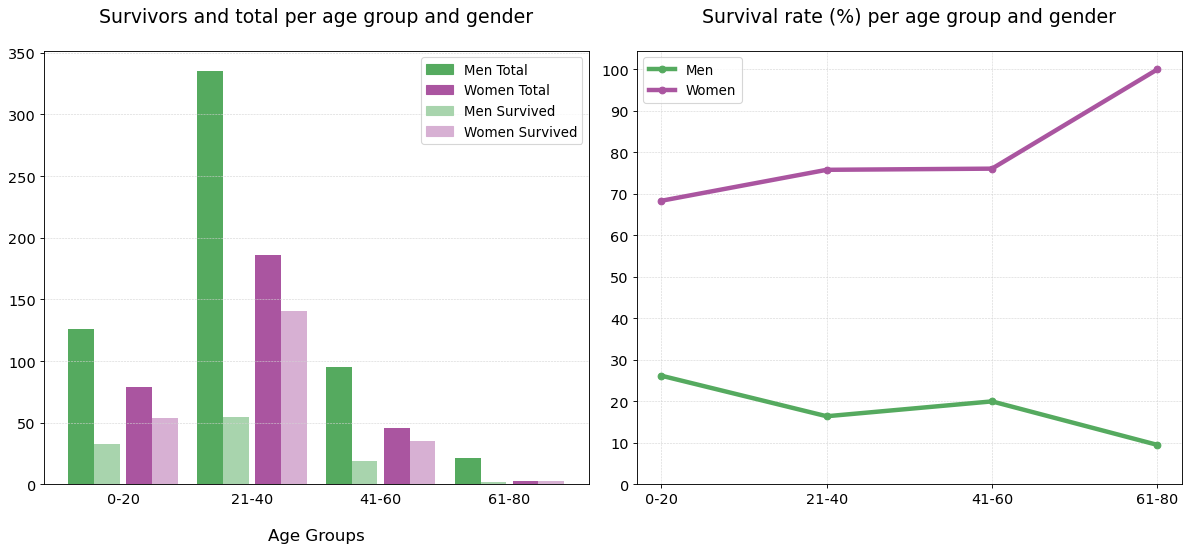

In [41]:
import matplotlib.patches as mpatches

#creating our X and Y variables
y2MS = dfagegender.loc[(dfagegender.Sex == 'male'), "Survivors"]
y2FS = dfagegender.loc[(dfagegender.Sex == 'female'), "Survivors"]
y2MT = dfagegender.loc[(dfagegender.Sex == 'male'), "Count"]
y2FT = dfagegender.loc[(dfagegender.Sex == 'female'), "Count"]
y2Perc = dfagegender.sort_values(['Sex', 'AgeRange'], ascending = [False, True])
y2MPerc = y2Perc.loc[(y2Perc.Sex == 'male'), "% Surv"]
y2FPerc = y2Perc.loc[(y2Perc.Sex == 'female'), "% Surv"]

y2MSFS = dfagegender.sort_values(['Sex', 'AgeRange'], ascending = [False, True])
y2MSFS = y2MSFS['Survivors'].reset_index(drop=True)

fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7), dpi = 80)

X2 = np.arange(4)
Y2 = np.arange(5)

plt.sca(ax1)

#creating the bars + spaces between
ax1.bar(X2 + 0.0, y2MT, color = '#55AA5F', width = 0.2)
ax1.bar(X2 + 0.2, y2MS, color = '#A8D4AD', width = 0.2)
ax1.bar(X2 + 0.45, y2FT, color = '#AA55A0', width = 0.2)
ax1.bar(X2 + 0.65, y2FS, color = '#d7b0d3', width = 0.2)

#legend
ax1.legend(handles=[men, women,menS, womenS], loc = 'upper right', fontsize = 12)
men = mpatches.Patch(color='#55AA5F', label='Men Total')
women = mpatches.Patch(color='#AA55A0', label='Women Total')
menS = mpatches.Patch(color='#A8D4AD', label='Men Survived')
womenS = mpatches.Patch(color='#d7b0d3', label='Women Survived')

#other parameters
plt.grid(b=True, which='both', axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.title('Survivors and total per age group and gender\n', fontsize = 17)

plt.xticks(X2 + 0.325, labels, fontsize = 13)
plt.xlabel('\nAge Groups',  fontsize = 15)
plt.ylabel('',  fontsize = 15)
plt.yticks(fontsize=13, rotation=0)
ax1.tick_params(bottom = False)

#Second plot

plt.sca(ax2)
xline = np.arange(0, 4, 1)
ax2.plot(xline, y2MPerc, color='#55AA5F', linewidth = 4,  marker='o')
ax2.plot(xline, y2FPerc, color='#AA55A0', linewidth = 4, marker='o')
plt.title('Survival rate (%) per age group and gender\n', fontsize = 17)

plt.xticks(X2, labels, fontsize = 13)
plt.yticks(np.arange(0,110, 10), fontsize=13, rotation=0)
ax1.tick_params(bottom = False)

ax2.legend(labels = ['Men','Women'], loc = 'upper left', fontsize = 12)
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Here we see that our previous insight was not completely true, the survival rate goes down only for men but because they account for roughly 65% of the dataset. If we look at the graph on the right we see that for women, being older correlates with higher chances of survival. But does it make sense ? Why would an old woman have more chances to survive ? Younger women are more likely to be in shape and physically stronger.

But we also saw that survival rate is linked to pclass, let's see if there is a relation between age and pclass, I would guess that older women are generally in higher classes and that gives them more chances to survive (maybe being in 1st class gives you the best location, we will check that with our deck variable).

In [42]:
dfcleanTrain2 = dfcleanTrain
#dfcleanTrain2['Sex'].replace(['male','female'],[0,1], inplace=True)

In [43]:
if 'Pclass_1' not in dfcleanTrain2.columns:
    classes = pd.get_dummies(dfcleanTrain2.Pclass, prefix='Pclass')
    dfcleanTrain2 = pd.concat([dfcleanTrain2, classes], axis=1)
    dfcleanTrain2.drop(columns=['Pclass'])
    
corr2 = dfcleanTrain2.corr()

corr2.round(2)

,PassengerId,Survived,Pclass,Title,Sex,Age,AgeRange,SibSp,Parch,Group,Fare,Alone,Embarked,Family,Deck,FarePerCap,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.00,-0.01,-0.04,-0.03,-0.04,0.04,0.03,-0.06,-0.00,-0.01,0.02,0.02,-0.03,-0.04,-0.03,0.03,0.03,-0.00,-0.03
Survived,-0.01,1.00,-0.34,0.56,0.54,-0.06,-0.06,-0.04,0.08,0.06,0.25,-0.25,0.11,0.02,-0.29,0.24,0.29,0.09,-0.32
Pclass,-0.04,-0.34,1.00,-0.16,-0.13,-0.37,-0.32,0.08,0.02,-0.04,-0.56,0.27,0.05,0.07,0.75,-0.77,-0.89,-0.19,0.92
Title,-0.03,0.56,-0.16,1.00,0.93,-0.07,-0.05,0.17,0.30,0.22,0.18,-0.39,0.09,0.27,-0.13,0.09,0.11,0.09,-0.17
Sex,-0.04,0.54,-0.13,0.93,1.00,-0.09,-0.07,0.11,0.25,0.18,0.17,-0.31,0.12,0.20,-0.11,0.08,0.10,0.06,-0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Deck,-0.03,-0.29,0.75,-0.13,-0.11,-0.28,-0.23,0.04,-0.03,-0.06,-0.53,0.21,-0.04,0.01,1.00,-0.69,-0.82,0.20,0.54
FarePerCap,0.03,0.24,-0.77,0.09,0.08,0.32,0.25,-0.09,-0.05,0.03,0.80,-0.18,0.05,-0.09,-0.69,1.00,0.81,-0.12,-0.60
Pclass_1,0.03,0.29,-0.89,0.11,0.10,0.36,0.30,-0.05,-0.02,0.06,0.61,-0.23,0.05,-0.05,-0.82,0.81,1.00,-0.29,-0.63
Pclass_2,-0.00,0.09,-0.19,0.09,0.06,0.01,0.02,-0.06,-0.00,-0.05,-0.12,-0.06,-0.19,-0.04,0.20,-0.12,-0.29,1.00,-0.57


In [44]:
dfageclass = dfcleanTrain2.groupby(['Sex','AgeRange'], as_index = False).aggregate(Total = ("Pclass_1", 'count'),
                                                Class1 = ("Pclass_1", 'sum'),
                                                Class2 = ("Pclass_2", 'sum'),
                                                Class3 = ("Pclass_3", 'sum'))

if 1 in dfageclass["Sex"]:
    dfageclass['Sex'] = dfageclass['Sex'].replace([1, 0], ['female', 'male'])

a=0
for i in range(1,4):
    dfageclass.insert(6 + a, '% Class' + str(i), (dfageclass['Class' + str(i)]/dfageclass.Total * 100).round(2))
    a += 1
    
dfageclass2 = dfcleanTrain.groupby(['Sex','Pclass'], as_index = False).aggregate(Count = ("Age", 'count'),
                                                MaxAge = ("Age", 'max'),
                                                MinAge = ("Age", 'min'),
                                                AvgAge = ("Age", 'mean')).round(1)   
    
display(dfageclass)
display(dfageclass2)

##boxplot and lines

,Sex,AgeRange,Total,Class1,Class2,Class3,% Class1,% Class2,% Class3
0,male,0.0,126,7,21,98,5.56,16.67,77.78
1,male,1.0,335,56,66,213,16.72,19.70,63.58
2,male,2.0,95,47,18,30,49.47,18.95,31.58
3,male,3.0,21,12,3,6,57.14,14.29,28.57
4,female,0.0,79,14,16,49,17.72,20.25,62.03
5,female,1.0,186,54,46,86,29.03,24.73,46.24
6,female,2.0,46,24,14,8,52.17,30.43,17.39
7,female,3.0,3,2,0,1,66.67,0.00,33.33


,Sex,Pclass,Count,MaxAge,MinAge,AvgAge
0,0,1,122,80.0,0.9,41.0
1,0,2,108,70.0,0.7,30.3
2,0,3,347,74.0,0.4,26.9
3,1,1,94,63.0,2.0,34.7
4,1,2,76,57.0,2.0,29.0
5,1,3,144,63.0,0.8,22.9


In [45]:
dfcleanTrain.loc[dfcleanTrain["Sex"] == 0,"Sex"] = 'male'
dfcleanTrain.loc[dfcleanTrain["Sex"] == 1,"Sex"] = 'female'

C:\Users\sarac\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


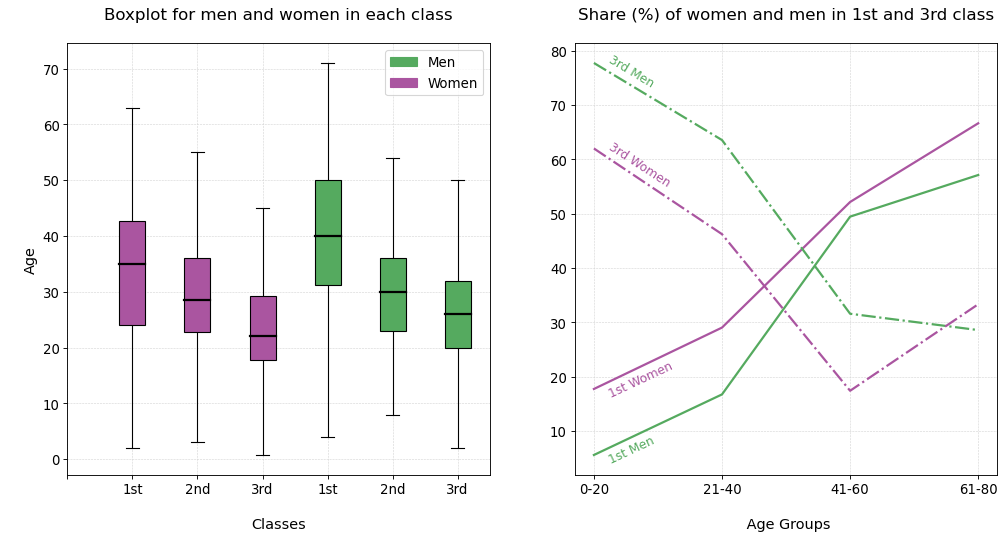

In [46]:
from matplotlib.lines import Line2D

M1 = dfageclass.loc[(dfageclass.Sex == 'male'), "% Class1"]
F1 = dfageclass.loc[(dfageclass.Sex == 'female'), "% Class1"]
M2 = dfageclass.loc[(dfageclass.Sex == 'male'), "% Class2"]
F2 = dfageclass.loc[(dfageclass.Sex == 'female'), "% Class2"]
M3 = dfageclass.loc[(dfageclass.Sex == 'male'), "% Class3"]
F3 = dfageclass.loc[(dfageclass.Sex == 'female'), "% Class3"]

fig3, (ax3, ax4) = plt.subplots(1,2, figsize=(15,7), dpi = 80)

databox= []
for i in ['female', 'male']:
    for j in [1,2,3]:
        f = dfcleanTrain.loc[(dfcleanTrain.Sex == str(i)) &(dfcleanTrain.Pclass == j),"Age"]
        databox.append(f)
        
#first plot
plt.sca(ax3)
plt.title('Boxplot for men and women in each class\n', fontsize = 15)
labelsbox=[' ','1st', '2nd', '3rd','1st', '2nd', '3rd']

flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=8,
                  linestyle=':', markeredgecolor='w')

medianprops = dict(linewidth=2, color='black')

box = ax3.boxplot(databox, widths=0.4, medianprops=medianprops, showfliers=False, patch_artist=True)

men = mpatches.Patch(color='#55AA5F', label='Men')
women = mpatches.Patch(color='#AA55A0', label='Women')

ax3.legend(handles = [men, women], loc = 'upper right', fontsize = 12)
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)
plt.xlabel('\nClasses',  fontsize = 13)
plt.ylabel('\nAge',  fontsize = 13)

plt.xticks(np.arange(7), labelsbox, fontsize = 12)
plt.yticks(fontsize = 12)

colors = ['#AA55A0','#AA55A0','#AA55A0', '#55AA5F','#55AA5F','#55AA5F']
for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)


#second plot
plt.sca(ax4)
plt.title('Share (%) of women and men in 1st and 3rd class\n', fontsize = 15)
xline = np.arange(0, 4, 1)

ax4.plot(xline, M1, color='#55AA5F', linewidth = 2)
ax4.plot(xline, F1, color='#AA55A0', linewidth = 2)
ax4.plot(xline, M3, color='#55AA5F', linewidth = 2, linestyle='-.')
ax4.plot(xline, F3, color='#AA55A0', linewidth = 2, linestyle='-.' )

ax4.text(0.1, 16.3, '1st Women', fontsize = 11, color='#AA55A0', rotation=25)
ax4.text(0.1, 4, '1st Men', fontsize = 11, color='#55AA5F', rotation=25)
ax4.text(0.1, 55, '3rd Women', fontsize = 11, color='#AA55A0', rotation=-33)
ax4.text(0.1, 73.5, '3rd Men', fontsize = 11, color='#55AA5F', rotation=-31)

plt.xlabel('\n Age Groups',  fontsize = 13)

plt.xticks(X2, labels, fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)

We see that people in more expensive classes are on average older and the share of people in 1st class goes up with age. So the reason why survival rate went up for older women is actually linked to the fact that they are mainly in 1st class. For men it should be the same but it looks like women and children first policy's effect comes before the effect of classes. It can make sense as the advantage of being in best classes is linked to the deck your cabin is in and that being in the best location only gives an advantage at the start of the incident (people going from their location to the rescue boats) but after that and thus for men, the physical abilities matters more.

To see if that hypothesis makes sense, let's look at the effect of being in different decks on survival rate per gender. We expect that for women, being on higher decks leads to higher survival rates and for men the effect should also be positive but smaller.

In [47]:
if 'Deck_0' not in dfcleanTrain.columns:
    dfcleanTrain = pd.get_dummies(dfcleanTrain, columns=['Deck'])

In [48]:
dfdeck = dfcleanTrain.groupby(['Sex', 'Survived'], as_index = False).aggregate(Total = ("Deck_0", 'count'),
                                                Deck_0 = ("Deck_0", 'sum'),Deck_1 = ("Deck_1", 'sum'),
                                                Deck_2 = ("Deck_2", 'sum'),Deck_3 = ("Deck_3", 'sum'),
                                                Deck_4 = ('Deck_4', 'sum'),Deck_5 = ("Deck_5", 'sum'),
                                                Deck_6 = ('Deck_6', 'sum'),Deck_7 = ("Deck_7", 'sum'),
                                                Deck_8 = ('Deck_8', 'sum'))
                                                                             
dfdeck

,Sex,Survived,Total,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8
0,female,0.0,81,0,0,0,3,0,1,0,2,75.0
1,female,1.0,233,0,1,27,24,18,14,5,2,142.0
2,male,0.0,468,1,8,12,21,8,7,5,0,406.0
3,male,1.0,109,0,6,8,11,7,10,3,0,64.0


Unfortunately we don't have enough data about the repartition in decks and most of our data is stored in deck 8 which is where we put all of our unknown data. 
But according to the website below, we know that upper decks were attributed to 1st class and lower decks to other classes. And unless there was a "rich people first policy", the only reason to have more chances to survive in 1st class has to be the cabin location.

https://www.encyclopedia-titanica.org/cabins.html 

Let's look at the effect of group size on survival rate. We will also check if the variable explains survival rate better if we separate in 'has a group' vs 'has no group'. Again we will separate by gender or else the men variable will drop survival rates of some category where men are the majority. For example, most of the Group = 0, people who travel alone group are men and we may think that travelling alone is a huge disadvantage but it may also be because people travelling alone are men so they are subject to the women and children first policy. Or maybe men are only at a disadvantage because they are mainly alone but this hypothesis doesn't hold as the survival rate for men that are not alone is way below the one of women in the same case.

In [49]:
#Let's create groups because we don't have enough data for so many different group sizes.

labelsGroup = ['Alone', '1', '2', '3', '4+']

if 'GroupSize' not in dfcleanTrain.columns:
    dfcleanTrain.insert(12, 'GroupSize', pd.cut(dfcleanTrain['Group'], bins=[-1, 0, 1, 2, 3, 100],
                                                labels = labelsGroup, right=True))
    
labelsGroup2 = ['Alone', 'not Alone']

if 'GroupSize2' not in dfcleanTrain.columns:
    dfcleanTrain.insert(12, 'GroupSize2', pd.cut(dfcleanTrain['Group'], bins=[-1, 0, 100],
                                                labels = labelsGroup2, right=True))

In [50]:
dfgroup = dfcleanTrain.groupby(['Pclass','GroupSize'], as_index = False).aggregate(Total = ("Survived", 'count'),
                                                Survivors = ("Survived", 'sum'))

dfgroup = dfcleanTrain.groupby(['Sex','GroupSize'], as_index = False).aggregate(Total = ("Survived", 'count'),
                                                Survivors = ("Survived", 'sum'))

dfgroup.insert(3, '% Surv', (dfgroup.Survivors/dfgroup.Total * 100).round(2))

with pd.option_context('display.max_rows', None):
  display(dfgroup)

,Sex,GroupSize,Total,% Surv,Survivors
0,female,Alone,103,70.87,73.0
1,female,1,92,80.43,74.0
2,female,2,55,89.09,49.0
3,female,3,24,95.83,23.0
4,female,4+,40,35.00,14.0
5,male,Alone,378,15.08,57.0
6,male,1,89,21.35,19.0
7,male,2,46,36.96,17.0
8,male,3,20,45.00,9.0
9,male,4+,44,15.91,7.0


In [51]:
GF = dfgroup.loc[(dfgroup.Sex == 'female'), "% Surv"]
GM = dfgroup.loc[(dfgroup.Sex == 'male'), "% Surv"]

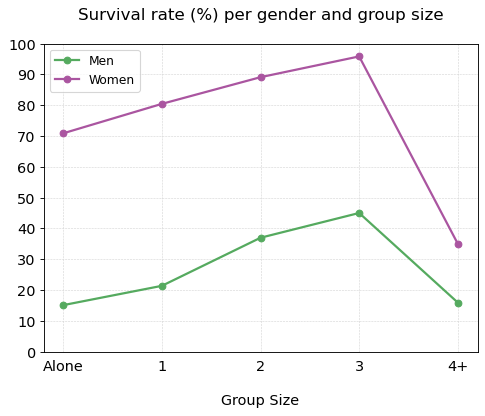

In [52]:
fig3, ax5 = plt.subplots(figsize=(7,5), dpi = 80)

xlineG = np.arange(0, 5, 1)
ax5.plot(xlineG, GM, color='#55AA5F', linewidth = 2,  marker='o')
ax5.plot(xlineG, GF, color='#AA55A0', linewidth = 2, marker='o')
plt.title('Survival rate (%) per gender and group size\n', fontsize = 15)

XG = np.arange(5)

plt.xticks(XG, labelsGroup, fontsize = 13)
plt.yticks(np.arange(0,110, 10), fontsize=13, rotation=0)
ax5.tick_params(bottom = False)

ax5.legend(labels = ['Men','Women'], loc = 'upper left', fontsize = 11)
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)

plt.xlabel('\nGroup Size',  fontsize = 13)

plt.show()

Being alone is certainly not the best case scenario and it seems that having groups bigger than 3 leads to lower survival rates. We also know from our correlation matrix that there is a weak negative relationship between group size and age, and between group size and sex. It means that bigger groups are more often made up of women and younger persons.

In [53]:
dfemb = dfcleanTrain.groupby(['Sex','Embarked'], as_index = False).aggregate(Total = ("Survived", 'count'),
                                                Survivors = ("Survived", 'sum'),
                                                 AvgFare = ("FarePerCap", 'mean') )

dfemb.insert(4, '% Surv', (dfemb.Survivors/dfemb.Total * 100).round(2))

dfemb

,Sex,Embarked,Total,Survivors,% Surv,AvgFare
0,female,0,205,142.0,69.27,14.695366
1,female,1,73,64.0,87.67,26.154521
2,female,2,36,27.0,75.00,8.555278
3,male,0,441,77.0,17.46,13.157370
4,male,1,95,29.0,30.53,22.043789
5,male,2,41,3.0,7.32,8.087561


People from Cherbourg seem to have more chances to survive and if we look at our correlation matrix, we see that embarking from Cherbourd is correlated with being in upper classes and embarking from Queenstown is the opposite. We can also look at the average fare and see that people from Chersbourg are way richer. So the of port of embarkation certainly affect survival rate because of its correlation to the Pclass variable. 

We could look at many more variables and relationships but we have enough knowledge to build a predictive model in my opinion and this dataset is too famous for me to find new insights that we have never seen.

## 3. Prediction

We will try multiple models and use GridSearch to try multiple parameter combinations

#### Decision tree

In [58]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [55]:
dfcleanTrain2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Title', 'Name', 'Sex', 'Age',
       'AgeRange', 'SibSp', 'Parch', 'Ticket', 'Group', 'Fare', 'Alone',
       'Embarked', 'Family', 'Deck', 'FarePerCap', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [57]:
X = dfcleanTrain2.drop(['Survived', 'Name',
                        'Ticket',
                        'PassengerId'], axis = 1)
y = dfcleanTrain2["Survived"]

In [125]:
rfe_selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select = 5, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title'], dtype='object')

It looks like those 5 variables are the best to predict our outcome it makes sense after the analysis. The suprising part is that the family variable is better than group. The only difference between the two were the fact the family takes only family into account but group looks at people who bought the ticket together.

In [99]:
X = dfcleanTrain2[['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex', 'Alone']]

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth": range(5, 10)},
                   cv = 5, return_train_score = False)

clf.fit(X, y)
clf.cv_results_

dftree = pd.DataFrame(clf.cv_results_).head(5)
dftree[["param_criterion","param_max_depth",
        "param_splitter","mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False)

,param_criterion,param_max_depth,param_splitter,mean_test_score
0,gini,5,best,0.826031
2,gini,6,best,0.822685
4,gini,7,best,0.819308
3,gini,6,random,0.805819
1,gini,5,random,0.796849


#### Linear regression

In [116]:
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 8, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex',
       'Alone'],
      dtype='object')

In [117]:
X = dfcleanTrain2[['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex', 'Alone']]

clf2 = GridSearchCV(LogisticRegression(solver='liblinear', multi_class = 'auto'), {
    "C": range(5, 15),
    "fit_intercept": [True, False],
    "penalty": ['l1', 'l2']},
                   cv = 5, return_train_score = False)

clf2.fit(X, y)
clf2.cv_results_

dflog = pd.DataFrame(clf2.cv_results_).head(5)

dflog[["param_C", "param_fit_intercept", 'param_penalty'
       , "mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False)

,param_C,param_fit_intercept,param_penalty,mean_test_score
0,5,True,l1,0.808097
4,6,True,l1,0.808097
1,5,True,l2,0.806974
2,5,False,l1,0.793522
3,5,False,l2,0.792398


#### Neural Network

In [119]:
from sklearn.neural_network import MLPClassifier

rfe_selector = RFE(estimator=MLPClassifier(),n_features_to_select = 8, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex',
       'Alone'],
      dtype='object')

In [120]:
X = dfcleanTrain2[['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex', 'Alone']]

clf3 = GridSearchCV(MLPClassifier(random_state=0, max_iter = 500), {
    "hidden_layer_sizes": [(50,50,50), (50,100,50)],
    'alpha': [0.0001, 0.05],
    'activation': ['tanh'],
    "learning_rate" : ['constant', 'adaptive'],
    "solver": ['sgd', 'adam']},
                   cv = 5, return_train_score = False)

clf3.fit(X, y)
clf3.cv_results_

dfNN = pd.DataFrame(clf3.cv_results_).head(5)

dfNN[["param_hidden_layer_sizes", "param_learning_rate", 'param_activation'
       ,'param_alpha','param_solver', "mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False)

,param_hidden_layer_sizes,param_learning_rate,param_activation,param_alpha,param_solver,mean_test_score
0,"(50, 50, 50)",constant,tanh,0.0001,sgd,0.804720
2,"(50, 50, 50)",adaptive,tanh,0.0001,sgd,0.804714
4,"(50, 100, 50)",constant,tanh,0.0001,sgd,0.804714
1,"(50, 50, 50)",constant,tanh,0.0001,adam,0.800232
3,"(50, 50, 50)",adaptive,tanh,0.0001,adam,0.800232


#### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 6, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex'], dtype='object')

In [148]:
X = dfcleanTrain2[['Pclass', 'AgeRange', 'Fare', 'Embarked', 'Title', 'Sex', 'Alone', 'Deck']]

clf4 = GridSearchCV(RandomForestClassifier(random_state=0), {
    "criterion": ['gini', 'entropy'],
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    "max_depth": [5,10]},
                   cv = 5, return_train_score = False)

clf4.fit(X, y)
clf4.cv_results_

dfRF = pd.DataFrame(clf4.cv_results_).head(5)

dfRF[["param_criterion", "param_n_estimators", 'param_max_features',
       'param_max_depth', "mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False)

,param_criterion,param_n_estimators,param_max_features,param_max_depth,mean_test_score
0,gini,200,auto,5,0.826018
2,gini,200,sqrt,5,0.826018
4,gini,200,log2,5,0.821543
1,gini,500,auto,5,0.820400
3,gini,500,sqrt,5,0.820400


#### SVC

In [91]:
from sklearn.svm import SVC

rfe_selector = RFE(estimator=SVC(),n_features_to_select = 7, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex'], dtype='object')

In [124]:
X = dfcleanTrain2[['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex', 'Alone']]

clf5 = GridSearchCV(SVC(probability=True, kernel = 'linear' ),{
    "gamma": ['scale', 'auto']},
                   cv = 5, return_train_score = False)

clf5.fit(X, y)
clf5.cv_results_

dflog = pd.DataFrame(clf5.cv_results_).head(5)

dflog[['param_gamma'
       , "mean_test_score"]].sort_values(by=['mean_test_score'], ascending=False)

,param_gamma,mean_test_score
0,scale,0.786737
1,auto,0.786737


#### Let's predict with our best model

We create our best model with the best parameters

In [103]:
#dfcleanTest['Sex'].replace(['male','female'],[0,1],inplace=True)

In [104]:
bestmodel = DecisionTreeClassifier(random_state=0, criterion = 'gini',
                                   splitter = 'best', max_depth = 5)

cross_val_score(bestmodel, X, y, cv=5).mean().round(4)

0.826

In [149]:
bestmodel2 = RandomForestClassifier(random_state=0, criterion = 'gini', n_estimators= 500,
    max_features = 'auto', max_depth = 5)

cross_val_score(bestmodel2, X, y, cv=5).mean().round(4)

0.826

In [150]:
bestmodel2.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

In [152]:
Xpred = dfcleanTest[['Pclass', 'AgeRange', 'FarePerCap', 'Embarked', 'Title', 'Sex', 'Alone']]
ypred = bestmodel2.predict(Xpred)

In [ ]:
#pd.set_option("display.max_rows", None)
#Xpred

In [ ]:
#np.where(np.isnan(Xpred))

Here we add the values we predicted for the survived variable

In [153]:
dfcleanTest = dfcleanTest.drop('Survived', 1)

dfcleanTest['Survived'] = ypred

In [154]:
Final = dfcleanTest[['PassengerId','Survived']]

In [159]:
Final['Survived'] = Final['Survived'].astype(int)
Final.dtypes

<ipython-input-159-ff57d2b20a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final['Survived'] = Final['Survived'].astype(int)


PassengerId    int64
Survived       int32
dtype: object

PassengerId    int64
Survived       int32
dtype: object

We export it in a CSV to upload the results on Kaggle and get a score

In [158]:
Final.to_csv('C:/Users/sarac/Desktop/Projects/KagglePrivate/Titanic_Data/titanic/Final4.csv', index=False)

I got a score of 0.79425 (ranked 850th, top 1,69%) with this model on Kaggle. I could try more models and change some of the data but it is pretty good. The goal of this exercise is to train myself and not to get the best score, in a real scenario you don't get to resubmit your work multiple times so being able to get a good model after a good analysis is key.

Thinking back about the way I did it, maybe the webscraping of ages may be considered as cheating as I used external data and people getting a score of 1 find the answers on the web and create a perfect submission file. Nonetheless I wanted to add a webscraping part to train myself as it can be really useful in some cases to gather data.